# MRI Modalities

MRI is versatile. Tuning the MRI scanner in different ways allows us to generate images that are sensitive to varying underlying biological properties. This is done by creating contrast between tissue types.

## Image Contrast

MRI scans are acquired using a combination of magnetic fields and radiofrequency pulses. While inside the magnetic field in the scanner, radiofrequency pulses transmit energy to tissues within the brain. These tissues then emit energy differently depending on unique tissue properties and produce different signal intensities. These varying signal intensities in the MR image create a contrast. This contrast allows us to distinguish between different tissue types. 

See this short [video](https://www.youtube.com/watch?v=1CGzk-nV06g) for a visual explanation.

Various contrasts can be created by tuning the MRI scanner in different ways using **MRI sequences**. Different MRI sequences provide unique information regarding the underlying biological properties. We often call these **MRI modalities**.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting

## T1-weighted and T2-weighted MRI

The time taken for energy to be emitted is called **relaxation time**. This can be broadly broken down into two types:

### T1 relaxation
The longitudinal relaxation time (T1) is the time taken for protons in the tissue to emit energy while realigning with the main magnetic field.  

### T2 relaxation
The transverse relaxation time (T2) is the time taken for protons in the tissue to emit energy while losing coherence (i.e. moving out of time with each other).

|                | T1 (ms)      | T2 (ms)     |
| :-------------: | :----------: | :-----------: |
|  Bones | 500   | 50    |
|  CSF | 4000   | 500    |
|  Grey Matter | 1300   | 110    |
|  White Matter   | 800 | 80 |

### Tissue Relaxation Properties Create Image Contrast

MRI sequences can be *weighted* towards T1 or T2 relaxation properties to produce unique image contrasts. We often abbreviate this to T1w or T2w images.

The graphs below show how brain tissues have different relaxation properties. 

Tissues with faster relaxation properties have higher signal in T1w images. Tissues with slower relaxation properties have lower signal in T1w images. The reverse is true in T2w images.

Higher signal relates to brighter voxels in an image. 

<img src="../fig/relaxations.png" alt="Drawing" align="middle" width="1000px"/>

Can you tell which tissue type would be brightest and darkest on a T1-weighted and T2-weighted image?

This is a complex topic that we cannot cover in detail here. If you would like more detail, this [review article](https://pmj.bmj.com/content/89/1050/209) is a good place to start.

### Visualising T1w and T2w Images

With our new understanding of image contrasts, lets visualise this!

Lets use a dataset we have already downloaded:

- [Craving dataset](https://openneuro.org/datasets/ds003242/versions/1.0.0): Cue Induced Craving task following food fasting, social isolation and baseline

In [68]:
# first state the directory we have downloaded the data in
local_data_dir = '../data/'

# create filename variables - this helps make the commands in the next cell easier to read
T1_filename = local_data_dir + 'modalities_examples/craving_sub-SAXSISO01b_T1w.nii.gz'
T2_filename = local_data_dir + 'modalities_examples/craving_sub-SAXSISO01b_T2w.nii.gz'      


### Read T1w and T2w anatomical images

In [69]:
# lets load the images using nibabel (see previous episode)
T1_img = nib.load(T1_filename)
T2_img = nib.load(T2_filename)

# grab data array
T1_data = T1_img.get_fdata()
T2_data = T2_img.get_fdata()

# print basic information of images
print('T1 image path: {},\n\timage shape: {}'.format(T1_filename, T1_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T1_data.ravel()),np.max(T1_data.ravel())))
print('\nT2 image path: {},\n\timage shape: {}'.format(T2_filename, T2_img.shape))
print('\tintensity value range: min: {:3.2f}, max: {:3.2f}'.format(np.min(T2_data.ravel()),np.max(T2_data.ravel())))


T1 image path: ../data/modalities_examples/craving_sub-SAXSISO01b_T1w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 526.00

T2 image path: ../data/modalities_examples/craving_sub-SAXSISO01b_T2w.nii.gz,
	image shape: (176, 256, 256)
	intensity value range: min: 0.00, max: 326.00


### Visualize T1w and T2w Images

Nilearn is a useful package for visualising MRI data using python.

The cell below plots a single slice from three views: Coronal, Sagittal, Axial

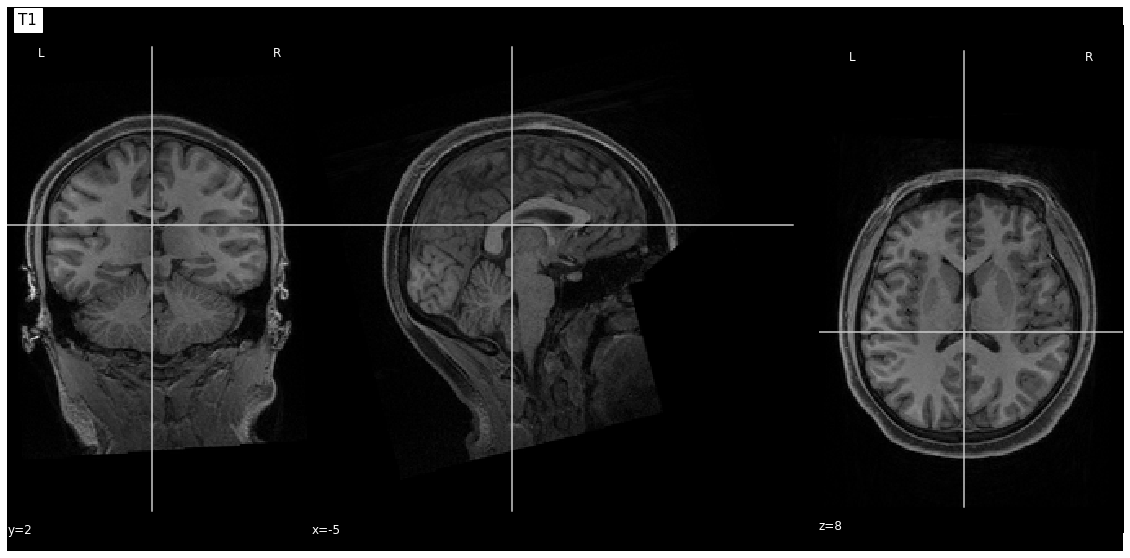

In [70]:
fig, ax1 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T1_filename, title="T1", vmax=500, axes=ax1)

Can you plot the T2w image?

Solution:

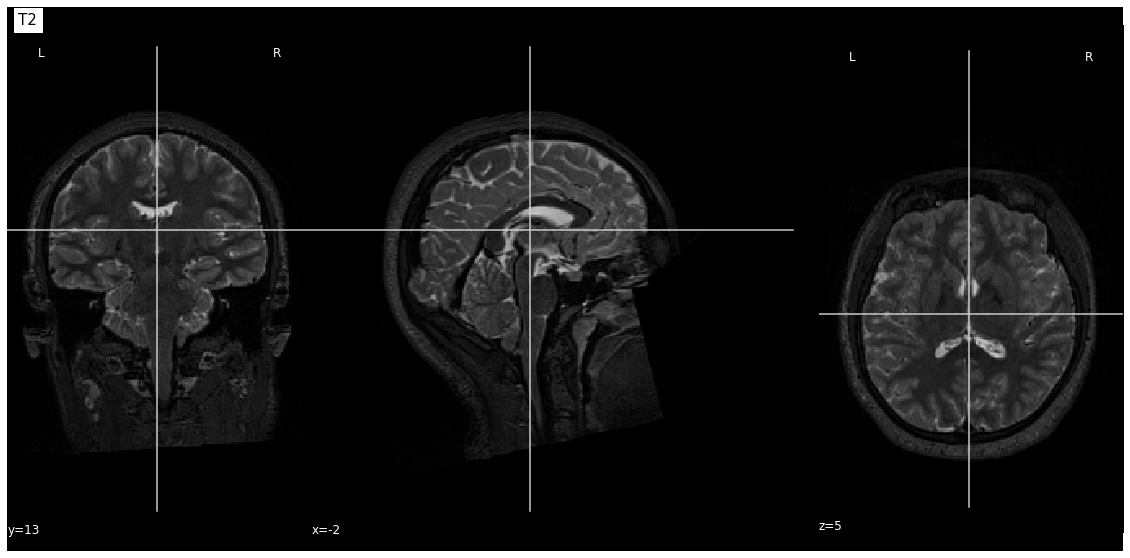

In [71]:
fig, ax2 = plt.subplots(figsize=(20,10))
plotting.plot_anat(T2_filename, title="T2", vmax=300, axes=ax2)

Do the signal intensities in the T1w and T2w images agree with the plots of their relaxation properties above?

### Challenge

Using what you learned in the last session. Can you view the T1w or T2w images interactively using another command from the `nilearn` module?

Solution

/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:85: UserWarning: choosing both vmin and a threshold is not allowed; setting vmin to 0
  warnings.warn('choosing both vmin and a threshold is not allowed; '



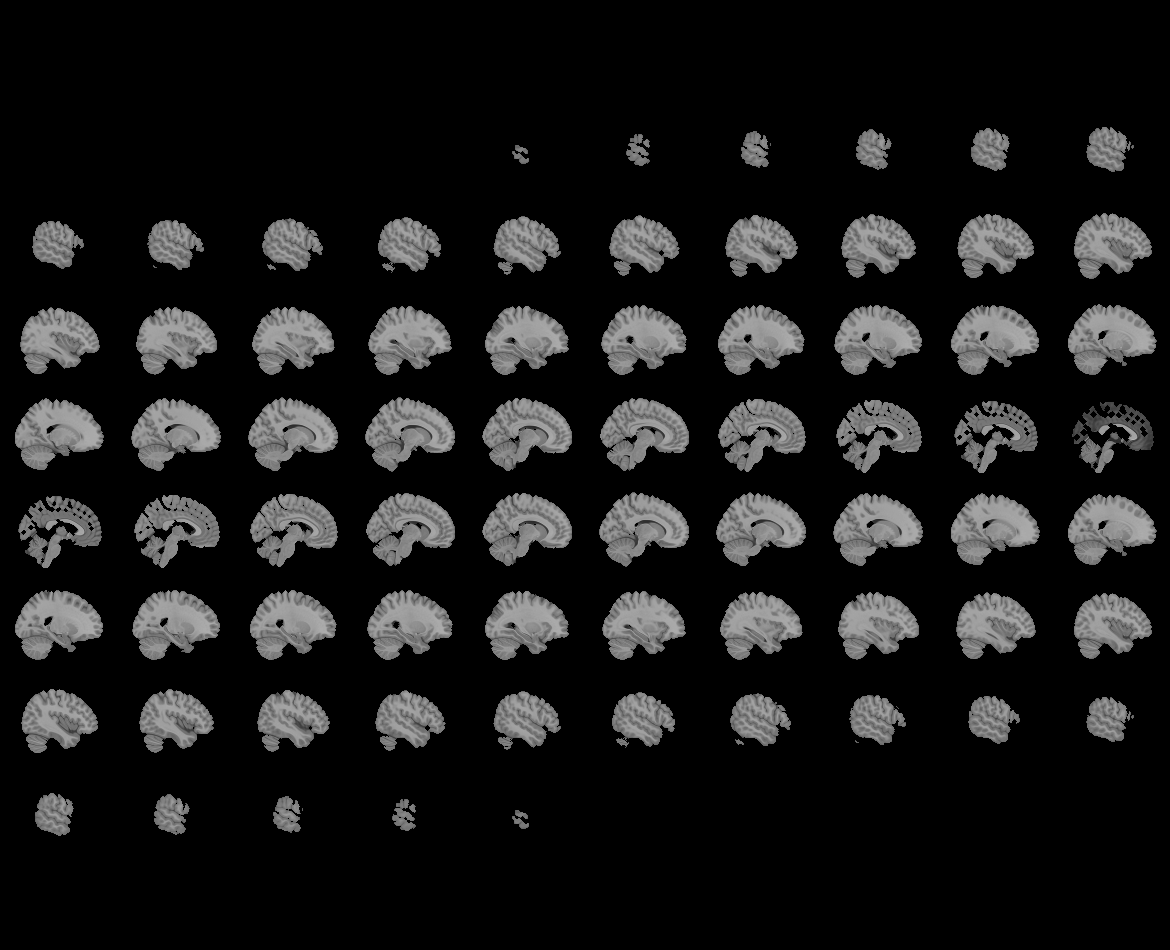
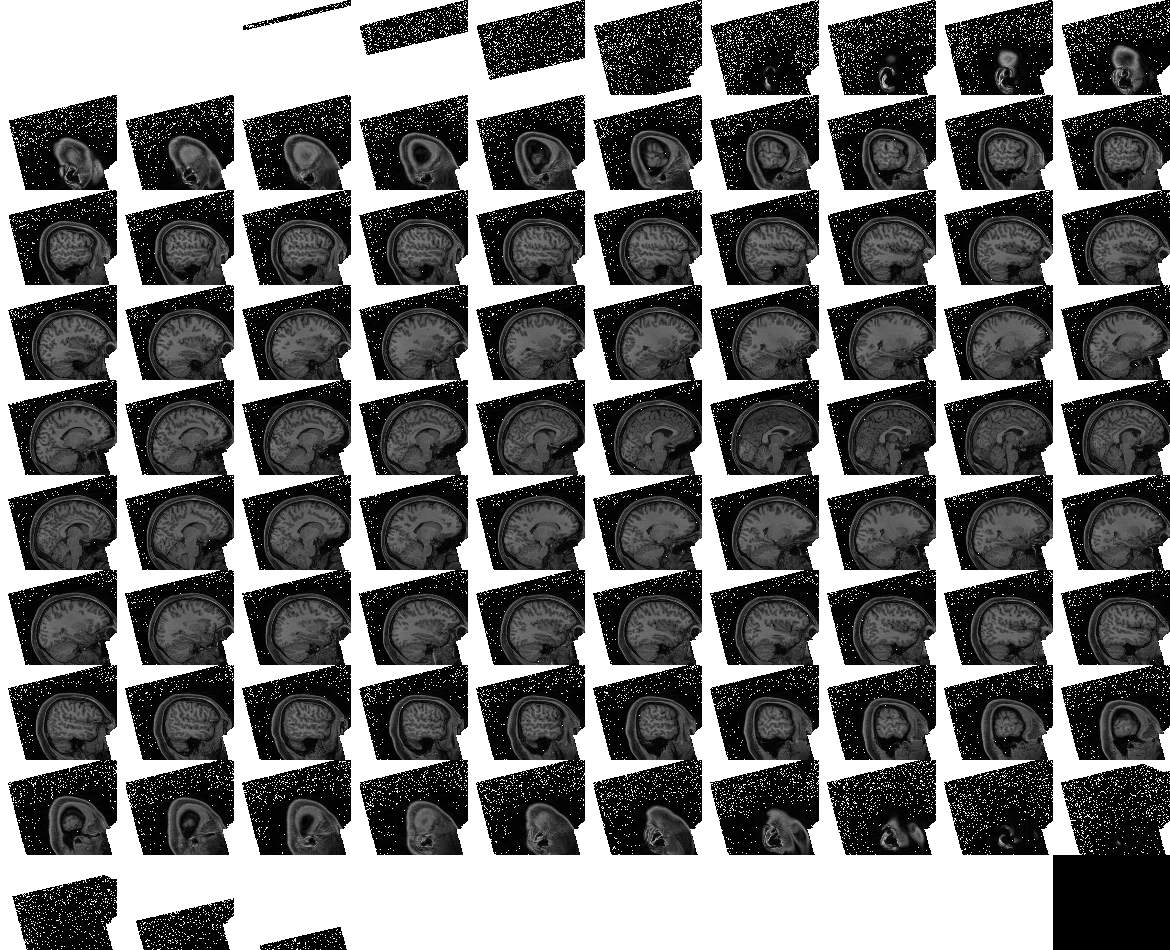

In [72]:
plotting.view_img(T1_filename, black_bg=True, colorbar=False, cmap="gray", symmetric_cmap=False, vmin=0)

## Diffusion MRI

Diffusion MRI is sensitive to the movement of water in the brain. The movement of water in the brain is highly directional. This means it is more likely to move along the connections between brain areas. 

We can use this information to build an image of what the connections in our brain looks like. 

In [73]:
# we have already downloaded some diffusion MRI data for you
hardi_fname = local_data_dir + 'dmri_examples/HARDI150.nii.gz'
hardi_bval_fname = local_data_dir + 'dmri_examples/HARDI150.bval'
hardi_bvec_fname = local_data_dir + 'dmri_examples/HARDI150.bvec'

In [74]:
# load data
hardi_img = nib.load(hardi_fname)
bvals = np.loadtxt(hardi_bval_fname)
bvecs = np.loadtxt(hardi_bvec_fname)

What's the shape of the data?

In [75]:
bvals

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.,
       2000., 2000.,

In [76]:
hardi_data = hardi_img.get_fdata()
hardi_data.shape

(81, 106, 76, 160)

Diffusion MRI data is 4-dimensional. A 3D image (81, 106, 76) is acquired many times with sensitivities to the diffusion of water in different directions.

Lets visualise some of these directions:

In [77]:
# lets pick an axial slice in the middle
ax_slice = hardi_data.shape[2] // 2;
print('Middle axial slice is:', ax_slice)

Middle axial slice is: 38


Text(0.5, 1.0, '150th Direction')

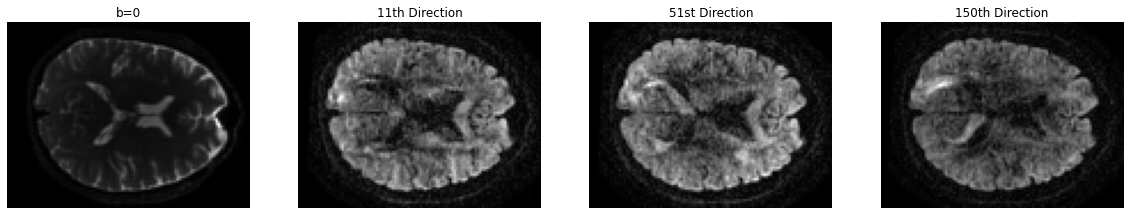

In [78]:
# visualise various directions from raw diffusion MRI data

# set up figure
plt.figure(figsize=(20, 20))

# plot first direction 
# (the first direction is often b=0 and is not sensitive to a particular direction of water diffusion)
plt.subplot(1, 4, 1).set_axis_off()
plt.imshow(hardi_data[:,:,ax_slice,0], cmap='gray')
plt.title("b=0")

# plot another direction
plt.subplot(1, 4, 2).set_axis_off()
plt.imshow(hardi_data[:,:,ax_slice,10], cmap='gray')
plt.title("11th Direction")

# plot another direction
plt.subplot(1, 4, 3).set_axis_off()
plt.imshow(hardi_data[:,:,ax_slice,50], cmap='gray')
plt.title("51st Direction")

# plot another direction
plt.subplot(1, 4, 4).set_axis_off()
plt.imshow(hardi_data[:,:,ax_slice,150], cmap='gray')
plt.title("150th Direction")


EXERCISE HERE TO REPRODUCE ABOVE

Diffusion MRI data needs to be processed before we can visualise properties associated with underlying biology.

We won't go into this here, but check out the [DIPY examples](https://dipy.org/documentation/1.5.0/examples_built/reconst_dti/#example-reconst-dti) or the [diffusion MRI software carpentry course](https://carpentries-incubator.github.io/SDC-BIDS-dMRI/).

Two main measures we can extract after processing diffusion MRI data are:
1. **Fractional Anisotropy (FA):** Higher values indicate diffusion of water is more directional (e.g. along connections in the white matter).
2. **Mean Diffusivity (MD):** Higher values indicate an overall increase in diffusion (e.g. in free diffusing water in the cerebrospinal fluid surrounding the brain).

We've created these maps for you. Try loading them using `nibabel`

In [79]:
# load FA
fa_data, fa_affine = load_nifti('../data/dmri_examples/FA.nii.gz')

# load MD
md_data, md_affine = load_nifti('../data/dmri_examples/MD.nii.gz')

Let's plot a slice of FA and MD to visualise what they look like

Text(0.5, 1.0, 'MD')

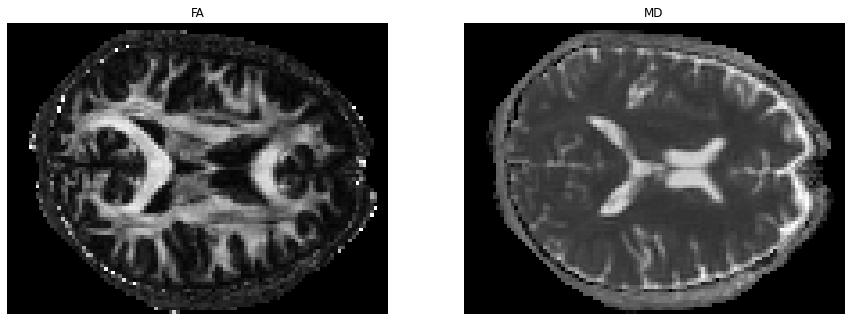

In [80]:
# set up plot
plt.figure(figsize=(15, 20))

# plot FA
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(fa_data[:, :, ax_slice], cmap='gray')
plt.title("FA")

# plot MD
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(md_data[:, :, ax_slice], cmap='gray')
plt.title("MD")

## Functional MRI

Functional MRI is sensitive to brain activity. More specifically, the rush of blood and oxygen to the area of brain activity. This is called the Blood Oxygen Level Dependent (**BOLD**) response. 

Again, this is a large topic which we can't cover here. If you'd like to know more, see this blog from the [Royal Society](https://royalsociety.org/blog/2016/08/qa-what-is-bold/) and the [fMRI software carpentry course](https://carpentries-incubator.github.io/SDC-BIDS-fMRI/index.html).

To get an idea of how functional MRI compares to T1w, T2w and diffusion MRI modalities, we will visualise some data without processing it.

The data has already been downloaded from a project on OpenNeuro about [adult language learners](https://openneuro.org/datasets/ds003542/versions/1.0.0).

In [81]:
# first lets load the image using the filename we can construct below
fmri_filename = local_data_dir + 'fmri_examples/sub-01-func-sub-01_task-compL1_run-1_bold.nii.gz'
fmri_image = nib.load(fmri_filename)

In [82]:
# Let's grab the data from the nibabel object again.
fmri_data = fmri_image.get_fdata()

What is the shape of the fmri data?

Solution

In [83]:
fmri_data.shape

(64, 64, 32, 186)

The structure of functional MRI data also has a 4th dimension (i.e. volumes). 

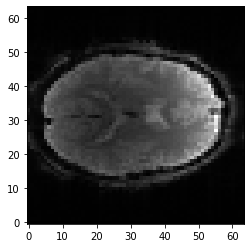

In [84]:
fig, ax = plt.subplots()
ax.imshow(fmri_data[:, :, 15, 0], cmap="gray", origin="lower")

Using the code from the diffusion MRI section, can you visualise the first 4 function MRI volumes?

Solution

Text(0.5, 1.0, 'Volume 4')

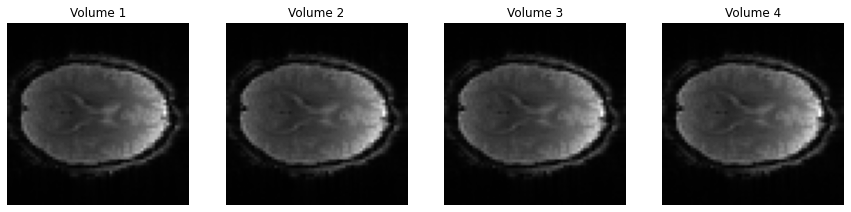

In [85]:
plt.figure(figsize=(15, 20))

ax_slice = fmri_data.shape[2] // 2;

plt.subplot(1, 4, 1).set_axis_off()
plt.imshow(fmri_data[:,:,ax_slice,0], cmap='gray')
plt.title("Volume 1")

plt.subplot(1, 4, 2).set_axis_off()
plt.imshow(fmri_data[:,:,ax_slice,1], cmap='gray')
plt.title("Volume 2")

plt.subplot(1, 4, 3).set_axis_off()
plt.imshow(fmri_data[:,:,ax_slice,2], cmap='gray')
plt.title("Volume 3")

plt.subplot(1, 4, 4).set_axis_off()
plt.imshow(fmri_data[:,:,ax_slice,3], cmap='gray')
plt.title("Volume 4")

The fourth dimension (volumes) now represent *time*. We are interested in how brain activity changes over the course of the scan or in response to experimental conditions carefully designed by the researcher.

Complex processing is needed to understand the BOLD response in an experimental design. However, we can glimpse the raw data in each voxel using a function from the nilearn package.

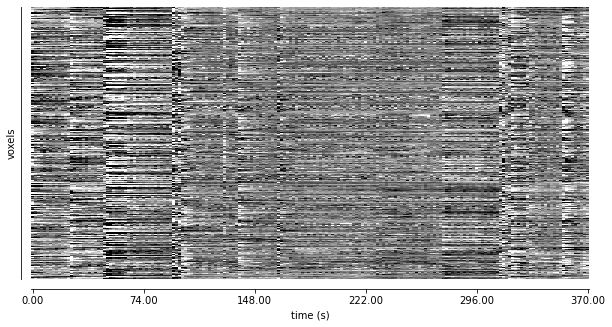

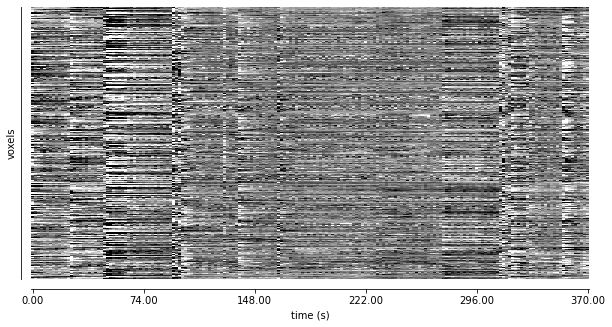

In [86]:
nilearn.plotting.plot_carpet(fmri_filename)

## Introducing BIDS

In MRI studies, you may have multiple MRI modalities for each participant. Organising your files can quickly become confusing!

The [Brain Imaging Data Structure (BIDS)](https://www.nature.com/articles/sdata201644) is a simple and intuitive way to organize and describe your neuroimaging and behavioural data. Neuroimaging experiments result in complicated data that can be arranged in several different ways. BIDS tackles this problem by suggesting a new standard (based on consensus from multiple researchers across the world) for the arrangement of neuroimaging datasets. Using the same organizational standard for all of your studies will also allow you to easily reuse your scripts and share data and code with other researchers.

For a more comprehensive overview, check out the [BIDS Starter Kit](https://github.com/bids-standard/bids-starter-kit/wiki).

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2016.44/MediaObjects/41597_2016_Article_BFsdata201644_Fig1_HTML.jpg" alt="Drawing" align="middle" width="600px"/>